In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_imdb.csv')

In [2]:
df.isnull().sum()

Unnamed: 0        0
Title             0
Year              0
Runtime           0
Director         87
Writer         1572
IMDB_Rating       0
Genre             0
Sub_Genre         0
Tier              0
Length            0
dtype: int64

In [3]:
#Removing unnamed
df = df.drop(labels=['Unnamed: 0'], axis = 1)

In [4]:
df.describe()

,Year,Runtime,IMDB_Rating
count,85855.000000,85855.000000,85855.000000
mean,1993.500891,100.351418,5.898656
std,24.216420,22.553848,1.234987
min,1894.000000,41.000000,1.000000
25%,1979.000000,88.000000,5.200000
50%,2003.000000,96.000000,6.100000
75%,2013.000000,108.000000,6.800000
max,2020.000000,808.000000,9.900000


In [5]:
df.columns

Index(['Title', 'Year', 'Runtime', 'Director', 'Writer', 'IMDB_Rating',
       'Genre', 'Sub_Genre', 'Tier', 'Length'],
      dtype='object')

<AxesSubplot:>

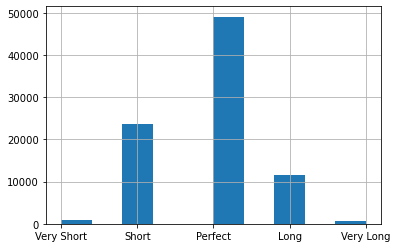

In [6]:
df.Length.hist()

<AxesSubplot:>

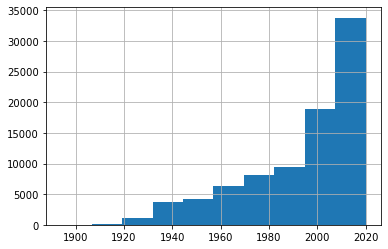

In [7]:
df.Year.hist()

<AxesSubplot:>

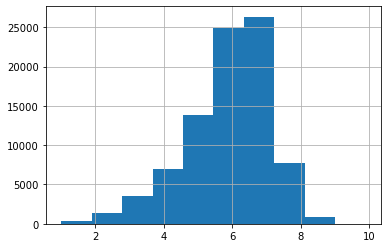

In [8]:
df.IMDB_Rating.hist()

<AxesSubplot:>

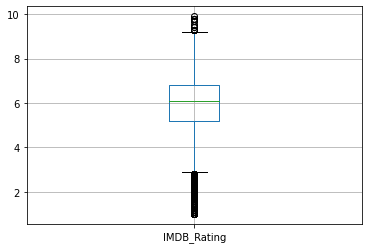

In [9]:
df.boxplot(column = ['IMDB_Rating'])

In [10]:
corr = df[['IMDB_Rating','Runtime','Year']].corr()

In [11]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

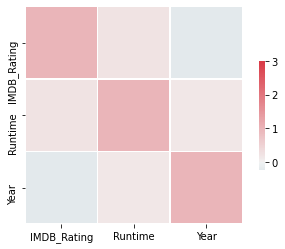

In [12]:
sns.heatmap(corr, vmax=3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [13]:
df.columns

Index(['Title', 'Year', 'Runtime', 'Director', 'Writer', 'IMDB_Rating',
       'Genre', 'Sub_Genre', 'Tier', 'Length'],
      dtype='object')

In [14]:
df_cat = df[['Genre', 'Sub_Genre','Tier']]

graph for Genre: total=23


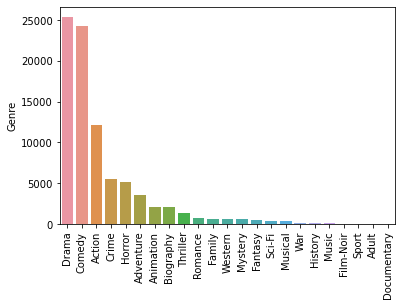

graph for Sub_Genre: total=24


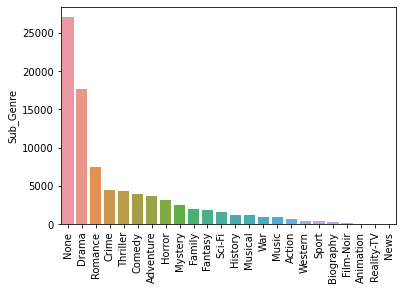

graph for Tier: total=5


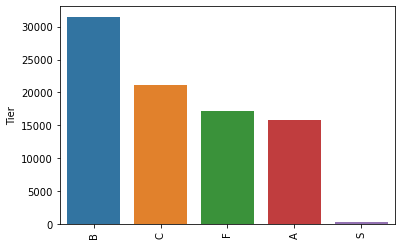

In [15]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total=%d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [16]:
pd.pivot_table(df, index = ['Tier'],values='Runtime')

,Runtime
Tier,
A,111.215406
B,100.301448
C,96.768522
F,94.269023
S,129.098901


In [17]:
pd.pivot_table(df, index = ['Length'],values='IMDB_Rating')

,IMDB_Rating
Length,
Long,6.483857
Perfect,5.920283
Short,5.535961
Very Long,6.908348
Very Short,6.046105


In [18]:
pd.pivot_table(df, index = ['Tier','Genre'],values='Runtime')

Runtime
Tier Genre                
A    Action     123.852479
     Adventure  114.003306
     Animation   89.634986
     Biography  122.936592
     Comedy     105.729418
...                    ...
S    Musical    144.125000
     Mystery     88.000000
     Romance    130.000000
     Thriller   104.250000
     Western    163.000000

[101 rows x 1 columns]

In [19]:
pd.pivot_table(df, index = 'Genre',values='IMDB_Rating').sort_values('IMDB_Rating', ascending = False)

,IMDB_Rating
Genre,
Documentary,7.300000
Biography,6.638413
Film-Noir,6.603448
Animation,6.386575
Music,6.283117
Drama,6.268865
Musical,6.205247
Crime,6.103743
War,6.078505


In [20]:
pd.pivot_table(df, index = ['Genre','Tier'],values='Runtime').sort_values('Tier', ascending = False)

,,Runtime
Genre,Tier,
Western,S,163.000000
Animation,S,90.375000
Romance,S,130.000000
Mystery,S,88.000000
Musical,S,144.125000
...,...,...
Horror,A,97.552239
Music,A,87.100000
Musical,A,124.072464


In [21]:
pd.set_option('display.max_rows',None)

In [23]:
pd.pivot_table(df, index = ['Tier'],values='Runtime').sort_values('Tier', ascending = False)

,Runtime
Tier,
S,129.098901
F,94.269023
C,96.768522
B,100.301448
A,111.215406
